In [1]:
!pip install audiofile opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 6.7 MB/s eta 0:00:00
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=0b1f1e8f074ebfd6d1efe02261603301d9b734a647d2933a48662540ebe73161
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [2]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import opensmile
import audiofile

In [3]:

# Constants
PATH = '/kaggle/input/berlin-database-of-emotional-speech-emodb/wav/'

# Emotion codes and their meanings (comes from German)
emotion_codes = {
    'W': 'anger',
    'L': 'boredom',
    'E': 'disgust',
    'A': 'anxiety',
    'F': 'happiness',
    'T': 'sadness',
    'N': 'neutral'
}

# Variables to hold data
file_emotion = []
file_path = []
speakers = []

# List of audio files in the EMODB directory (replace 'directory_list' with actual list of files)
directory_list = os.listdir(PATH)

for file in directory_list:
    file_path.append(PATH + file)
    speakers.append(int(file[:2]))  # Speaker ID is the first two characters
    emotion_code = file[5]  # Emotion code is the sixth character
    file_emotion.append(emotion_codes.get(emotion_code, 'Unknown'))  # Map emotion code to emotion

# Create DataFrame
emodb_df = pd.DataFrame(list(zip(speakers, file_emotion, file_path)),
                        columns=['SpeakerID', 'Emotion', 'Path'])

emodb_df


,SpeakerID,Emotion,Path
0,15,happiness,/kaggle/input/berlin-database-of-emotional-spe...
1,13,happiness,/kaggle/input/berlin-database-of-emotional-spe...
2,9,anger,/kaggle/input/berlin-database-of-emotional-spe...
3,15,anger,/kaggle/input/berlin-database-of-emotional-spe...
4,14,anger,/kaggle/input/berlin-database-of-emotional-spe...
...,...,...,...
530,8,neutral,/kaggle/input/berlin-database-of-emotional-spe...
531,14,boredom,/kaggle/input/berlin-database-of-emotional-spe...
532,8,sadness,/kaggle/input/berlin-database-of-emotional-spe...
533,15,neutral,/kaggle/input/berlin-database-of-emotional-spe...


In [4]:
# Define the demographic data
demographic_data = {
    'SpeakerID': [3, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'Sex': ['male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'female'],
    'Age': [31, 34, 21, 32, 26, 30, 32, 35, 25, 31]
}

# Create a DataFrame
demographics_df = pd.DataFrame(demographic_data)

# Print the DataFrame
demographics_df

,SpeakerID,Sex,Age
0,3,male,31
1,8,female,34
2,9,female,21
3,10,male,32
4,11,male,26
5,12,male,30
6,13,female,32
7,14,female,35
8,15,male,25
9,16,female,31


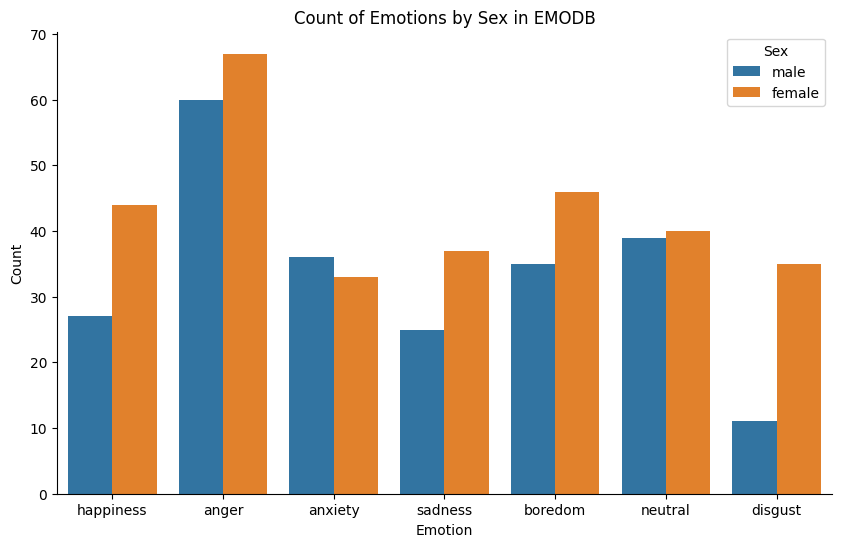

In [5]:
# Step 3: Correctly extract SpeakerID from file names
emodb_df['Filename'] = emodb_df['Path'].apply(lambda x: os.path.basename(x))  # Get only the filename
emodb_df['SpeakerID'] = emodb_df['Filename'].str[:2].astype(int)  # Extract SpeakerID and convert to int

# Merging with demographic data
emodb_df = pd.merge(emodb_df, demographics_df, on='SpeakerID', how='left')

# Continuing with your visualizations and analyses
plt.figure(figsize=(10, 6))
sns.countplot(data=emodb_df, x='Emotion', hue='Sex')
plt.title('Count of Emotions by Sex in EMODB')
plt.xlabel('Emotion')
plt.ylabel('Count')
sns.despine()
plt.show()

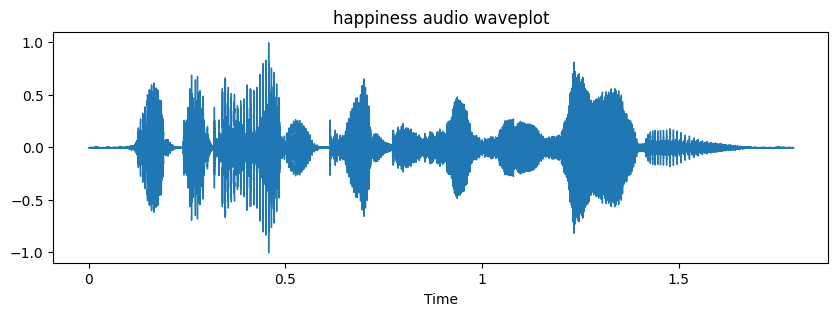

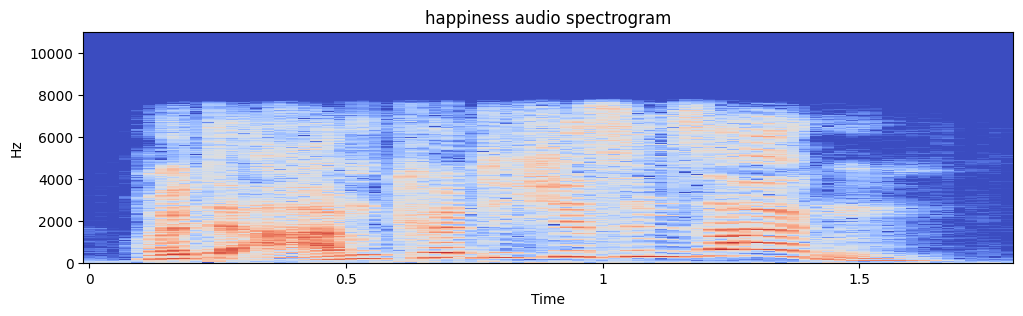

In [6]:
# Audio analysis functions
def waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f"{e} audio waveplot")
    librosa.display.waveshow(data, sr=sr)

def spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title(f"{e} audio spectrogram")
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
# Sample Audio Processing
path = emodb_df.iloc[0]["Path"]
emotion = emodb_df.iloc[0]["Emotion"]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [7]:
# Opensmile feature extraction adapted for EMODB
class openSmileExtractor():
    def __init__(self, featureLevel=opensmile.FeatureLevel.Functionals):
        self.smile = opensmile.Smile(
            feature_set=opensmile.FeatureSet.eGeMAPSv02,
            feature_level=featureLevel,
        )
    
    def processSignal(self, path):
        signal, sampling_rate = audiofile.read(path, always_2d=True)
        process = self.smile.process_signal(signal, sampling_rate)
        return process
    
    def processSignals(self, paths):
        features = pd.DataFrame()
        for path in paths:
            feature = self.processSignal(path)
            feature['Path'] = path  # Add the path for merging
            features = pd.concat([features, feature], ignore_index=True)
        return features
    
    def processDF(self, df, filename="opensmileDF_emodb.csv"):
        paths = list(df["Path"])
        feature_df = self.processSignals(paths)
        final_df = pd.merge(df, feature_df, how="left", on=["Path"])
        final_df.to_csv(filename)
        return final_df

extractor = openSmileExtractor(featureLevel=opensmile.FeatureLevel.Functionals)
res = extractor.processDF(emodb_df, filename="/kaggle/working/opensmileDF_emodb.csv")
res

,SpeakerID,Emotion,Path,Filename,Sex,Age,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,15,happiness,/kaggle/input/berlin-database-of-emotional-spe...,15a04Fd.wav,male,25,33.635345,0.230251,25.775436,36.956997,...,-0.001699,0.007132,0.706922,4.494382,4.046243,0.160000,0.197195,0.057500,0.032692,-18.386091
1,13,happiness,/kaggle/input/berlin-database-of-emotional-spe...,13b02Fb.wav,female,32,37.171261,0.147915,32.614513,35.472065,...,-0.016716,0.012057,0.198494,4.373178,2.958580,0.201000,0.128953,0.115000,0.094789,-18.577042
2,9,anger,/kaggle/input/berlin-database-of-emotional-spe...,09b01Wb.wav,female,21,40.538235,0.098185,38.587936,40.608749,...,0.027198,0.005507,0.427395,5.607477,4.306220,0.152222,0.089415,0.063750,0.024969,-19.188021
3,15,anger,/kaggle/input/berlin-database-of-emotional-spe...,15a01Wa.wav,male,25,38.678070,0.115872,34.523941,39.877567,...,0.021671,0.016472,0.187515,3.296703,2.824859,0.224000,0.154609,0.106000,0.063435,-18.870499
4,14,anger,/kaggle/input/berlin-database-of-emotional-spe...,14a05Wa.wav,female,35,40.611958,0.147944,36.786343,41.586903,...,-0.001218,0.014095,0.279358,5.012531,4.060914,0.151875,0.142004,0.077333,0.033757,-18.152895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,8,neutral,/kaggle/input/berlin-database-of-emotional-spe...,08b03Nb.wav,female,34,35.892841,0.103467,33.059807,36.228714,...,-0.018937,0.003781,0.474367,6.199461,3.825137,0.148571,0.096943,0.091429,0.068542,-15.872499
531,14,boredom,/kaggle/input/berlin-database-of-emotional-spe...,14a07Ld.wav,female,35,33.347363,0.220487,27.003342,32.447067,...,-0.037805,0.007066,0.431633,4.824562,2.690583,0.240000,0.179258,0.094286,0.053946,-14.135585
532,8,sadness,/kaggle/input/berlin-database-of-emotional-spe...,08b09Tb.wav,female,34,28.768560,0.150754,27.263535,29.990189,...,-0.055896,0.004807,0.346117,2.818991,1.943199,0.140000,0.099150,0.353077,0.404083,-18.424547
533,15,neutral,/kaggle/input/berlin-database-of-emotional-spe...,15b02Nd.wav,male,25,22.188255,0.137597,19.601456,22.004128,...,-0.039115,0.009017,0.299933,5.755396,3.663004,0.138000,0.100080,0.103636,0.052444,-20.212486
